<a href="https://colab.research.google.com/github/Rohitprakasam/CODSOFT/blob/main/CREDIT%20CARD%20FRAUD%20%20DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (1296675, 22)
Testing data shape: (555719, 22)
Columns in the training dataset: Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
Accuracy: 0.9965180172363931

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.86      0.48      0.62      1520

    accuracy                           1.00    259335
   macro avg       0.93      0.74      0.81    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:
 [[257699    116]
 [   787    733]]


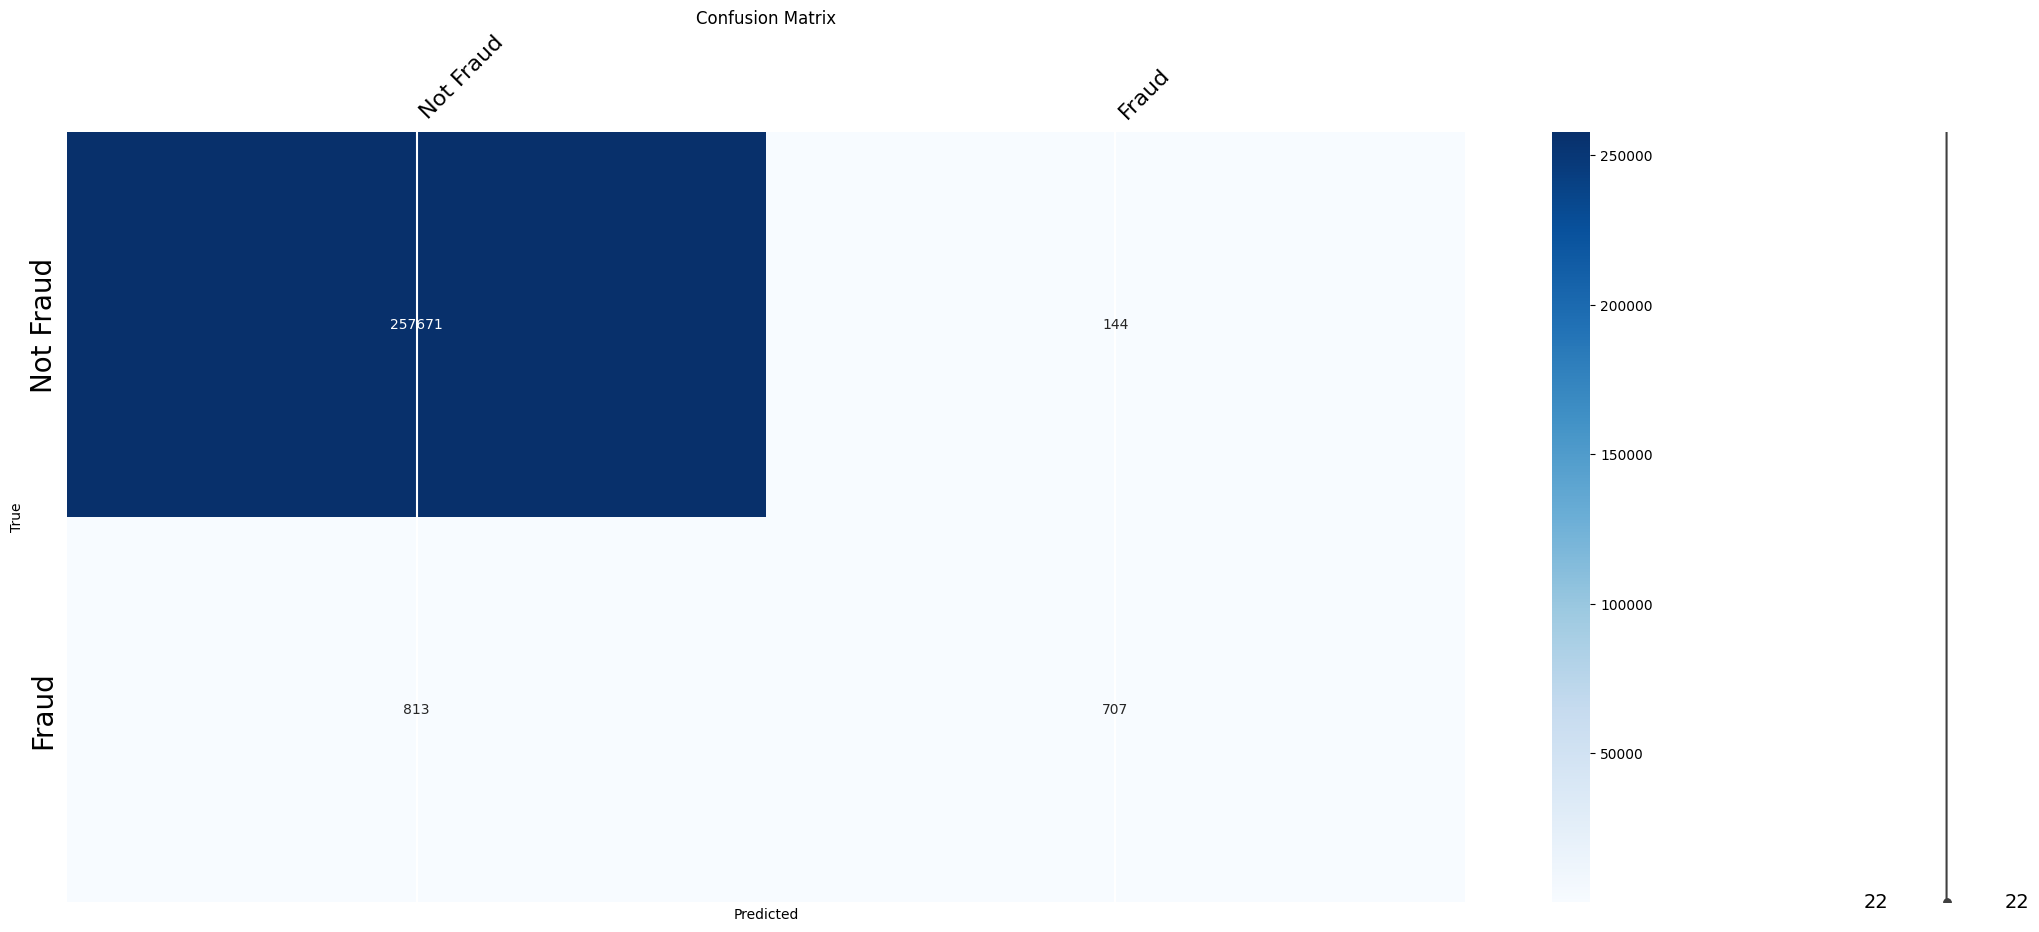

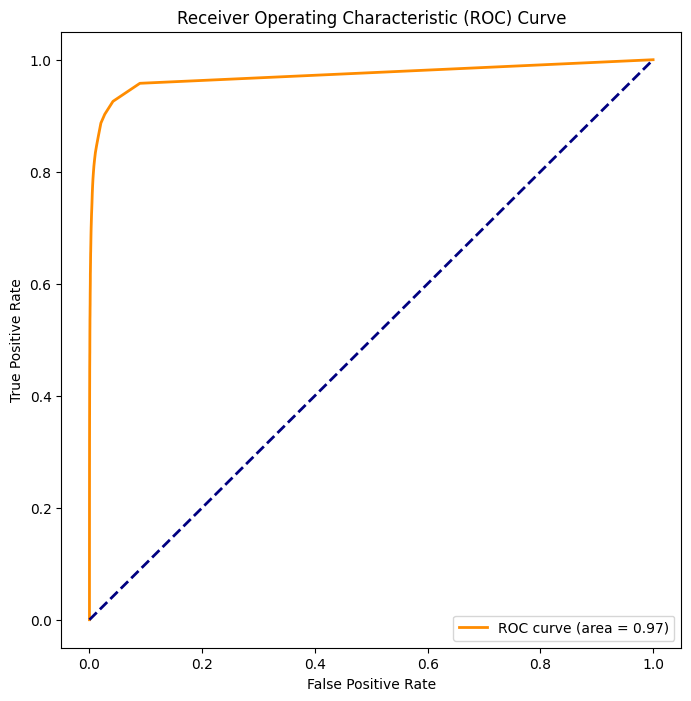

Prediction result: [0]


In [3]:
import pandas as pd

# Load training and testing datasets
training_data = pd.read_csv("/content/fraudTrain.csv", index_col=0)
testing_data = pd.read_csv("/content/fraudTest.csv", index_col=0)

# Display shapes of the datasets
print("Training data shape:", training_data.shape)
print("Testing data shape:", testing_data.shape)

# Import missingno library for visualizing missing data
import missingno as msno

# Display matrix of missing values in the training dataset
msno.matrix(training_data)
print("Columns in the training dataset:", training_data.columns)

# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract time-related features from 'trans_date_trans_time' column
training_data['trans_date_trans_time'] = pd.to_datetime(training_data['trans_date_trans_time'])
training_data['hour'] = training_data['trans_date_trans_time'].dt.hour
training_data['minute'] = training_data['trans_date_trans_time'].dt.minute
training_data['second'] = training_data['trans_date_trans_time'].dt.second
training_data['year'] = training_data['trans_date_trans_time'].dt.year
training_data['month'] = training_data['trans_date_trans_time'].dt.month
training_data['day'] = training_data['trans_date_trans_time'].dt.day

# Select features and target label
selected_features = ['cc_num', 'amt', 'lat', 'long', 'city_pop', 'hour', 'minute', 'second', 'year', 'month', 'day']
target_label = 'is_fraud'

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(training_data[selected_features], training_data[target_label], test_size=0.2, random_state=42)

# Create a Random Forest model
fraud_detection_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
fraud_detection_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = fraud_detection_model.predict(X_val)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Import necessary libraries for visualization
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection (choose appropriate features based on your requirements)
selected_features = ['amt', 'lat', 'long', 'city_pop', 'hour', 'minute', 'second', 'year', 'month', 'day']
X = training_data[selected_features]
y = training_data['is_fraud']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
fraud_model = RandomForestClassifier(n_estimators=100, random_state=42)
fraud_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = fraud_model.predict(X_valid)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, fraud_model.predict_proba(X_valid)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the confusion matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the loss function during training (if available)
if hasattr(fraud_model, 'history'):
    plt.figure(figsize=(10, 5))
    plt.plot(fraud_model.history['loss'], label='Training Loss')
    plt.plot(fraud_model.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.legend()
    plt.show()

# Plot the accuracy during training (if available)
if hasattr(fraud_model, 'history'):
    plt.figure(figsize=(10, 5))
    plt.plot(fraud_model.history['accuracy'], label='Training Accuracy')
    plt.plot(fraud_model.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.legend()
    plt.show()

# Create a new data frame for prediction
new_data = pd.DataFrame({
    'amt': [4.97],
    'lat': [36.08],
    'long': [-81.18],
    'city_pop': [3495],
    'hour': [0],
    'minute': [0],
    'second': [18],
    'year': [2019],
    'month': [1],
    'day': [1],
})

# Use the model to make predictions
predictions = fraud_model.predict(new_data)

# Output the prediction result
print("Prediction result:", predictions)
